<a href="https://colab.research.google.com/github/mohammedterryjack/ffast/blob/main/Ffast_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FFast for NLP and ML:
## Training an Intent classifier

## 1) Get some data

In [1]:
!wget 'https://raw.githubusercontent.com/clinc/oos-eval/master/data/data_full.json'

--2022-03-17 09:20:49--  https://raw.githubusercontent.com/clinc/oos-eval/master/data/data_full.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2495390 (2.4M) [text/plain]
Saving to: ‘data_full.json’

data_full.json      100%[===================>]   2.38M  --.-KB/s    in 0.04s   

2022-03-17 09:20:49 (59.7 MB/s) - ‘data_full.json’ saved [2495390/2495390]



In [5]:
from json import loads

with open('data_full.json') as json_file:
  data = loads(json_file.read())

In [22]:
data_train = data['oos_val'] + data['val']

In [23]:
sentences,target_intents = zip(*data_train)

In [24]:
len(sentences)

3100

## 2) Encode Text data using FFast

In [1]:
!pip install -U ffast

In [2]:
from ffast import load
tokeniser = load("poincare")

In [25]:
embed_text = lambda text: tokeniser.encode(text).vector

In [26]:
train_sentence_vectors = list(map(embed_text,sentences))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [27]:
INTENTS = sorted(set(target_intents))

map_intent_id_to_name = lambda index: INTENTS[index]
map_intent_name_to_id = lambda intent: INTENTS.index(intent)

In [28]:
train_intent_indexes = list(map(map_intent_name_to_id,target_intents))

## 3) Train an ML model

In [29]:
from sklearn.neural_network import MLPClassifier

In [48]:
classifier = MLPClassifier(
    hidden_layer_sizes=(100,100,100), 
    solver='sgd',
    learning_rate='adaptive',
    max_iter=1000,
    verbose=True
)

In [49]:
classifier.fit(train_sentence_vectors, train_intent_indexes)

Iteration 1, loss = 5.21159110
Iteration 2, loss = 5.04169411
Iteration 3, loss = 5.01972198
Iteration 4, loss = 5.00998344
Iteration 5, loss = 5.00427517
Iteration 6, loss = 4.99873623
Iteration 7, loss = 4.99306475
Iteration 8, loss = 4.98793056
Iteration 9, loss = 4.98264149
Iteration 10, loss = 4.97697353
Iteration 11, loss = 4.97061008
Iteration 12, loss = 4.96586751
Iteration 13, loss = 4.96113108
Iteration 14, loss = 4.95406509
Iteration 15, loss = 4.94529742
Iteration 16, loss = 4.93860574
Iteration 17, loss = 4.92948993
Iteration 18, loss = 4.92385151
Iteration 19, loss = 4.91406792
Iteration 20, loss = 4.90545090
Iteration 21, loss = 4.89644922
Iteration 22, loss = 4.88771513
Iteration 23, loss = 4.87766571
Iteration 24, loss = 4.86922112
Iteration 25, loss = 4.85929422
Iteration 26, loss = 4.84772293
Iteration 27, loss = 4.83578531
Iteration 28, loss = 4.82562266
Iteration 29, loss = 4.81716725
Iteration 30, loss = 4.80150351
Iteration 31, loss = 4.79051471
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(100, 100, 100), learning_rate='adaptive',
              max_iter=1000, solver='sgd', verbose=True)

## 4) Use your trained model to classify Intents

In [50]:
classify_intent = lambda text: map_intent_id_to_name(classifier.predict([embed_text(text)])[0])

In [51]:
sentences[110]

'i need to know how to say hello in france'

In [52]:
target_intents[110]

'translate'

In [53]:
classify_intent(sentences[110])

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


'translate'

## 5) Save your trained model

In [56]:
from joblib import dump, load
PATH = "intent_classifier.joblib.pkl"

In [57]:
dump(classifier, PATH, compress=9)

['intent_classifier.joblib.pkl']

In [58]:
classifier = load(PATH)

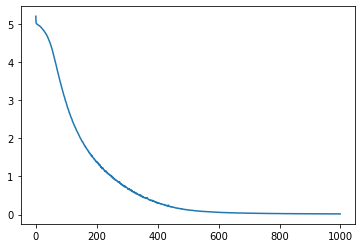

In [59]:
from matplotlib.pyplot import plot
plot(classifier.loss_curve_)

In [60]:
classify_intent(sentences[110])

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


'translate'